## Exercise 1

What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded an average temperature of 98.25 degrees and a standard deviation of 0.73 degrees.

Give a 99% confidence interval for the average body temperature of healthy people.


In [12]:
import scipy.stats as stats
import math
# Confidence interval formula is X̄ ± Z * (σ/√n)
# given values
sample_mean = 98.25
std_dev = 0.73
n = 130

# calculate the standard error
std_err = std_dev / math.sqrt(n)

# calculate the confidence interval
confidence = 0.99

print("99% confidence interval for the average body temperature of healthy people is:", stats.norm.interval(alpha=0.99, loc=sample_mean, scale=std_err))


99% confidence interval for the average body temperature of healthy people is: (98.08508192246582, 98.41491807753418)


## Exercise 2
The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.


In [11]:
import scipy.stats as stats
import math

# given values
sample_mean = 5.4
std_dev = 3.1
n = 500

# calculate the standard error
std_err = std_dev / math.sqrt(n)

# calculate the confidence interval
confidence = 0.95

# Second way: 
print("95% confidence interval for the mean length of stay for the population of patients is:", stats.norm.interval(alpha=0.95, loc=sample_mean, scale=std_err))

95% confidence interval for the mean length of stay for the population of patients is: (5.12827801242126, 5.67172198757874)


## Exercise 3
The hourly wages in a particular industry are normally distributed with mean 13.20 and standard deviation  2.50. A company in this industry employs 40 workers, paying them an average of 12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test.


In [9]:
# H0: μ = 13.20 
# Ha: μ < 13.20 
#t = (X̄ - μ) / (σ / √n)
import scipy.stats as stats
import math
import numpy as np
np.random.seed(101)

# given values
mu = 13.20
sample_mean = 12.20
std_dev = 2.50
n = 40
alpha = 0.01

# calculate the test statistic
t_statistic = (sample_mean - mu) / (std_dev / math.sqrt(n))

#calculate the p-value 
sample = np.random.normal(loc=sample_mean, scale=std_dev, size=n)

# perform the t-test
t_statistic, p_value = stats.ttest_1samp(sample, mu)
print(f"t_statistic: {t_statistic}" , f"p-value: {p_value}" )

# perform the hypothesis test with using p-value
if p_value < alpha:
    print("Reject the null hypothesis. The company can be accused of paying substandard wages.")
else:
    print("Fail to reject the null hypothesis. The company cannot be accused of paying substandard wages.")

t_statistic: -0.5516498351581299 p-value: 0.5843355529544192
Fail to reject the null hypothesis. The company cannot be accused of paying substandard wages.


## Exercise 4
Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

In [13]:
import pandas as pd
import scipy.stats as stats

# Load data from CSV file
df = pd.read_csv('soil.csv')

# Assume 'Soil1' and 'Soil2' are the column names
soil1 = df['Soil1'].dropna()  # dropna() is used to remove missing values (NaNs)
soil2 = df['Soil2'].dropna()

# Perform the independent two sample t-test
t_statistic, p_value = stats.ttest_ind(soil1, soil2)
print(f"t_statistic: {t_statistic}," , f"p-value: {p_value}" )

# If p-value is less than 0.01 then we reject the null hypothesis
if p_value < 0.01:
    print("We reject the null hypothesis. There is a significant difference in the mean shear strength between the two types of soils.")
else:
    print("We fail to reject the null hypothesis. There is not a significant difference in the mean shear strength between the two types of soils.")

t_statistic: 5.1681473319343345, p-value: 2.593228732352821e-06
We reject the null hypothesis. There is a significant difference in the mean shear strength between the two types of soils.


## Exercise 5

The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load data from CSV file
data = pd.read_csv('PISA_Test.csv')

# Descriptive statistics for each continent group.
continent_groups = data.groupby('Continent_Code')
print(continent_groups.describe())

               internet_users_per_100                                   \
                                count       mean        std        min   
Continent_Code                                                           
AF                                2.0  43.359918   7.297226  38.200000   
AS                               17.0  68.455613  21.086060  21.976068   
EU                               37.0  77.274888  12.425773  53.744979   
OC                                2.0  86.391704   2.589686  84.560519   
SA                                7.0  60.180494   9.772455  40.900000   

                                                            Math              \
                      25%        50%        75%        max count        mean   
Continent_Code                                                                 
AF              40.779959  43.359918  45.939877  48.519836   2.0  363.212100   
AS              50.300000  74.000000  84.948353  92.884826  17.0  466.216647   
EU     

In [29]:
# Determine whether there is any difference (on the average) for the math scores among European and Asian countries. 
eu_math_scores = data[data['Continent_Code'] == 'EU']['Math'].mean()
as_math_scores = data[data['Continent_Code'] == 'AS']['Math'].mean()
if eu_math_scores == as_math_scores:
    print(f"There is no difference for the math scores among European ({eu_math_scores}) and Asian countries ({as_math_scores})")
else:
    print(f"There is difference for the math scores among European ({eu_math_scores}) and Asian countries ({as_math_scores})")

There is difference for the math scores among European (477.98144864864867) and Asian countries (466.2166470588236)


In [33]:
t_stat, p_val = stats.ttest_ind(eu_math_scores, as_math_scores)
print(f"t_statistic: {t_statistic}," , f"p-value: {p_value}" )
if p_val < 0.01:
    print("P-value is less than 0.01. We can reject the null hypothesis that the means are equal.")
else:
    print("P-value is greater than 0.01. We cannot reject the null hypothesis that the means are equal.")

t_statistic: 5.1681473319343345, p-value: 2.593228732352821e-06
P-value is greater than 0.01. We cannot reject the null hypothesis that the means are equal.


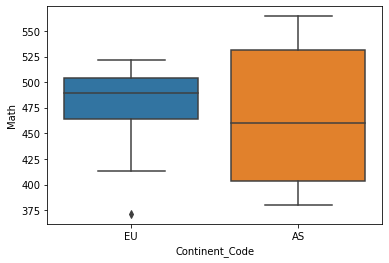

In [30]:
# Draw side-by-side box plots.
sns.boxplot(x='Continent_Code', y='Math', data=data[data['Continent_Code'].isin(['EU', 'AS'])])
plt.show()